In [1]:
!python -V

Python 3.9.23


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import pickle

In [5]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import root_mean_squared_error

In [6]:
import mlflow
mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment("nyc-taxi-experiment")

2026/01/20 13:32:22 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2026/01/20 13:32:22 INFO mlflow.store.db.utils: Updating database tables
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
2026/01/20 13:32:22 INFO mlflow.tracking.fluent: Experiment with name 'nyc-taxi-experiment' does not exist. Creating a new experiment.


<Experiment: artifact_location='/workspaces/mlops-zoomcamp-exercises/02-experiment-tracking/mlruns/1', creation_time=1768915942617, experiment_id='1', last_update_time=1768915942617, lifecycle_stage='active', name='nyc-taxi-experiment', tags={}>

In [19]:
df = pd.read_parquet('./data/green_tripdata_2021-01.parquet')
df['duration']=df.lpep_dropoff_datetime-df.lpep_pickup_datetime
df.duration=df.duration.apply(lambda td:td.total_seconds()/60)
df = df[(df.duration >= 1) & (df.duration <= 60)].copy()
categorical=['PULocationID','DOLocationID']
df[categorical]=df[categorical].astype(str)
numerical = ['trip_distance']



df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.50,...,0.5,0.00,0.00,None,0.3,6.80,2.0,1.0,0.00,3.933333
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.00,...,0.5,2.81,0.00,None,0.3,16.86,1.0,1.0,2.75,8.750000
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.00,...,0.5,1.00,0.00,None,0.3,8.30,1.0,1.0,0.00,5.966667
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.00,...,0.5,0.00,0.00,None,0.3,9.30,2.0,1.0,0.00,7.083333
7,2,2021-01-01 00:26:31,2021-01-01 00:28:50,N,1.0,75,75,6.0,0.45,3.50,...,0.5,0.96,0.00,None,0.3,5.76,1.0,1.0,0.00,2.316667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,2,2021-01-31 21:38:00,2021-01-31 22:16:00,None,NaN,81,90,NaN,17.63,56.23,...,0.0,0.00,6.12,None,0.3,65.40,NaN,NaN,NaN,38.000000
76514,2,2021-01-31 22:43:00,2021-01-31 23:21:00,None,NaN,35,213,NaN,18.36,46.66,...,0.0,12.20,6.12,None,0.3,65.28,NaN,NaN,NaN,38.000000
76515,2,2021-01-31 22:16:00,2021-01-31 22:27:00,None,NaN,74,69,NaN,2.50,18.95,...,0.0,0.00,0.00,None,0.3,22.00,NaN,NaN,NaN,11.000000
76516,2,2021-01-31 23:10:00,2021-01-31 23:37:00,None,NaN,168,215,NaN,14.48,48.87,...,0.0,0.00,6.12,None,0.3,58.04,NaN,NaN,NaN,27.000000


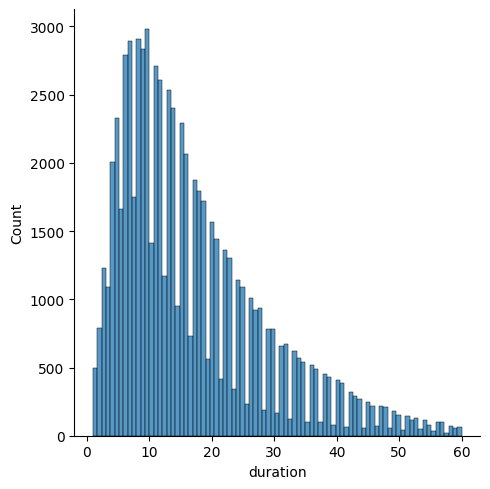

In [9]:
sns.displot(df.duration)
plt.show()

In [18]:
import pandas as pd

def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)
        df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
        df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)
    else:
        print("Unsupported file format")
        return None

    df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)].copy()

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [11]:
df_train = read_dataframe('./data/green_tripdata_2021-01.parquet')
df_val = read_dataframe('./data/green_tripdata_2021-02.parquet')

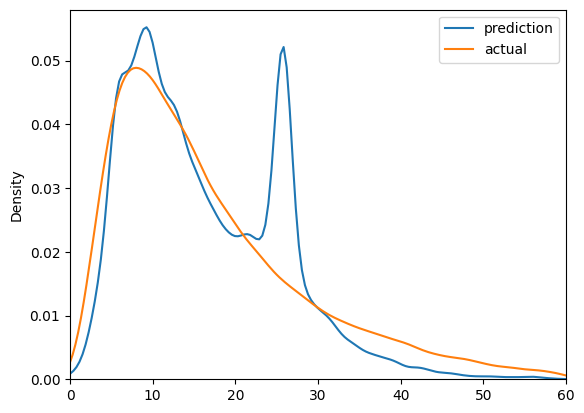

In [20]:
sns.kdeplot(y_pred, label='prediction')
sns.kdeplot(y_train, label='actual')

plt.xlim(0, 60)
plt.legend()
plt.show()

In [13]:
len(df_train),len(df_val)

(73908, 61921)

In [14]:
df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [15]:
categorical=['PU_DO']  #['PULocationID','DOLocationID']
numerical = ['trip_distance']

dv=DictVectorizer()

train_dicts=df_train[categorical+numerical].to_dict(orient='records')
X_train=dv.fit_transform(train_dicts)

val_dicts=df_val[categorical+numerical].to_dict(orient='records')
X_val=dv.transform(val_dicts)

In [16]:
target='duration'
y_train=df_train[target].values
y_val=df_val[target].values

In [17]:
lr=LinearRegression()
lr.fit(X_train,y_train)

y_pred=lr.predict(X_val)

root_mean_squared_error(y_val,y_pred)


7.758715208009878

In [26]:
with mlflow.start_run():

    mlflow.set_tag('developer','nick')

    mlflow.log_param("train-data-path", "data/green_tripdata_2021-01.parquet")
    mlflow.log_param("val-data-path", "data/green_tripdata_2021-02.parquet")
    alpha=0.01
    mlflow.log_param("alpha",alpha)

    lr=Lasso(alpha=alpha)
    lr.fit(X_train,y_train)


    y_pred = lr.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_pred)
    mlflow.log_metric("rmse", rmse)

In [22]:
lr=LinearRegression()
lr.fit(X_train,y_train)

y_pred=lr.predict(X_train)
root_mean_squared_error(y_train,y_pred)


5.699564118198926

In [23]:
lr=Ridge()
lr.fit(X_train,y_train)

y_pred=lr.predict(X_val)

root_mean_squared_error(y_val,y_pred)

7.70373515548786

In [24]:
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)